In [373]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif

import warnings
 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [374]:
data = pd.read_table('steel_alloying.csv', sep=';', index_col=0, decimal=',')
data = data[data['t вып-обр'].notna()] # удаляем пустые строки
data.columns
data.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,NaN,12809.016393,115.5,1.0,1.0,1.0,18.611,NaN,NaN,NaN,NaN,0.170,NaN,0.401,0.123,0.02,NaN,NaN,NaN,0.051939,0.112,NaN,0.182,NaN,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.003,0.037,NaN,63.7,1.1,3.7,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,NaN,12816.346154,111.6,1.0,1.0,1.0,11.659,NaN,NaN,NaN,NaN,0.488,NaN,NaN,0.094,0.02,NaN,NaN,NaN,0.050854,0.102,NaN,0.251,NaN,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.003,0.038,NaN,58.5,0.8,4.9,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,NaN,12511.420613,115.8,1.0,1.0,1.0,19.871,NaN,NaN,NaN,NaN,0.050,NaN,0.346,0.061,0.02,NaN,NaN,NaN,0.052807,0.160,NaN,0.204,NaN,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.003,0.038,NaN,58.0,0.8,8.6,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664959,NaN,12998.149706,116.3,1.0,1.0,1.0,19.497,NaN,NaN,0.077,NaN,0.050,NaN,0.390,0.059,0.02,NaN,NaN,NaN,0.053349,0.161,NaN,0.345,NaN,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.003,0.038,NaN,59.8,0.4,6.4,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,NaN,12987.475538,115.0,1.0,1.0,1.0,16.649,NaN,NaN,0.082,NaN,0.050,NaN,0.412,0.035,0.02,NaN,NaN,NaN,0.051975,0.149,NaN,0.263,NaN,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,0.0003,0.421,0.105,

In [375]:
data.drop(['nplv', 'DT', 'ПРОФИЛЬ', 'произв количество обработок'], axis=1, inplace=True)
data.drop(['произв  количество плавок', 'произв количество плавок (цел)'], axis=1, inplace=True)
data.drop(['ферспл  ферванит', 'расход C пров.', 'сыпуч кварцит', 'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)', 'сыпуч  кокс. мелочь КМ1', 'ферспл FeSi-75','ферспл FeV азот.', 'ферспл  FeV-80', 'ферспл  фх850А'], axis=1, inplace=True)
data.drop(['эл. энергия', 'температура последняя'], axis=1, inplace=True) # довольно точно совпадает с t под током
# t последняя спорно
# вернём 'ферспл  Mn5Si65Al0.5', 'ферспл SiMn18',
#удалим лишние химстали
data.drop(['химсталь первый Cu_1', 'химсталь первый Mo_1', 'химсталь первый N_1', 'химсталь первый Ni_1', 'химсталь первый P_1',
       'химсталь первый S_1', 'химсталь первый Ti_1', 'химсталь последний Cu', 'химсталь последний Mo', 'химсталь последний N',
       'химсталь последний Ni', 'химсталь последний P', 'химсталь последний S', 'химсталь последний Ti'], axis=1, inplace=True)
data.drop(['химсталь первый C_1', 'химсталь первый Cr_1', 'химсталь последний C', 'химсталь последний Cr', 'ферспл FeMo', 'произв жидкая сталь'], axis=1, inplace=True)
#data.drop(['чист расход Mn',
  #     'чист расход Si', 'ферспл  Mn5Si65Al0.5', 'ферспл SiMn18'])

In [376]:
data.columns

Index(['МАРКА', 't вып-обр', 't обработка', 't под током', 't продувка',
       'ПСН гр.', 'чист расход C', 'чист расход Cr', 'чист расход Mn',
       'чист расход Si', 'чист расход V', 'температура первая', 'Ar (интенс.)',
       'N2 (интенс.)', 'эл. энергия (интенс.)', 'расход газ Ar',
       'расход газ  N2', 'сыпуч известь РП', 'сыпуч  шпат плав.',
       'ферспл CaC2', 'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.',
       'ферспл SiMn18', 'химсталь первый Al_1', 'химсталь первый Mn_1',
       'химсталь первый Si_1', 'химсталь первый V_1', 'химсталь последний Al',
       'химсталь последний Ca', 'химсталь последний Mn',
       'химсталь последний Si', 'химсталь последний V',
       'химшлак первый Al2O3_1', 'химшлак первый CaO_1',
       'химшлак первый FeO_1', 'химшлак первый MgO_1', 'химшлак первый MnO_1',
       'химшлак первый R_1', 'химшлак первый SiO2_1',
       'химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
     

In [377]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6444 entries, 0 to 7040
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   МАРКА                    6444 non-null   object 
 1   t вып-обр                6444 non-null   float64
 2   t обработка              6440 non-null   float64
 3   t под током              6440 non-null   float64
 4   t продувка               6444 non-null   float64
 5   ПСН гр.                  5249 non-null   float64
 6   чист расход C            6435 non-null   float64
 7   чист расход Cr           5883 non-null   float64
 8   чист расход Mn           6431 non-null   float64
 9   чист расход Si           6431 non-null   float64
 10  чист расход V            6178 non-null   float64
 11  температура первая       6436 non-null   float64
 12  Ar (интенс.)             6426 non-null   float64
 13  N2 (интенс.)             1389 non-null   float64
 14  эл. энергия (интенс.)   

In [378]:
marks = data['МАРКА'].unique()
marks

array(['Э76ХФ', 'Э73Ф', 'Э90ХАФ', 'G2HH', 'Э76', 'Э76Ф', '900А', 'Э76ХАФ',
       'R350HT', 'НХ', 'R260', 'Ш2.2', 'Ш2Л', 'С255', 'С345', 'С355',
       '09Г2С'], dtype=object)

In [379]:
dict_marks_df = {}

for mark in marks:
    dict_marks_df[mark] = data[data['МАРКА'] == mark]
    dict_marks_df[mark].drop(['МАРКА'], axis=1, inplace=True)


In [380]:
dict_marks_df['Э76ХФ'].head()

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),расход газ Ar,расход газ N2,сыпуч известь РП,сыпуч шпат плав.,ферспл CaC2,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,химсталь первый Al_1,химсталь первый Mn_1,химсталь первый Si_1,химсталь первый V_1,химсталь последний Al,химсталь последний Ca,химсталь последний Mn,химсталь последний Si,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,13.606742,NaN,12809.016393,18.611,NaN,NaN,0.123,0.02,0.112,NaN,0.182,0.002,0.682,0.459,0.002,0.003,0.0001,0.779,0.559,0.037,NaN,63.7,1.1,3.7,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,8.074721,NaN,12816.346154,11.659,NaN,NaN,0.094,0.02,0.102,NaN,0.251,0.002,0.643,0.461,0.002,0.003,0.0003,0.767,0.543,0.038,NaN,58.5,0.8,4.9,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,13.801968,NaN,12511.420613,19.871,NaN,NaN,0.061,0.02,0.160,NaN,0.204,0.002,0.674,0.455,0.002,0.004,0.0009,0.788,0.568,0.038,NaN,58.0,0.8,8.6,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,12.664959,NaN,12998.149706,19.497,NaN,0.077,0.059,0.02,0.161,NaN,0.345,0.002,0.611,0.434,0.001,0.003,0.0002,0.795,0.571,0.038,NaN,59.8,0.4,6.4,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,10.298350,NaN,12987.475538,16.649,NaN,0.082,0.035,0.02,0.149,NaN,0.263,0.002,0.652,0.447,0.002,0.003,0.0003,0.796,0.568,0.037,NaN,59.6,0.7,4.7,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [381]:
def description_nulls(features, bin=20):
    null_list = []
    for name in features.columns:
        if features[name].isna().sum() / features.shape[0] == 1:
            print(name)
            null_list.append(name)
    return null_list

In [382]:
for mark in marks:
    print("---------------------\n", mark)
    null_list = description_nulls(dict_marks_df[mark].iloc[:, 1:])
    dict_marks_df[mark].drop(null_list, axis=1, inplace=True)

---------------------
 Э76ХФ
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
---------------------
 Э73Ф
чист расход Cr
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
---------------------
 Э90ХАФ
ферспл  Ni H1 пласт.
---------------------
 G2HH
чист расход V
N2 (интенс.)
расход газ  N2
---------------------
 Э76
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
---------------------
 Э76Ф
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
---------------------
 900А
чист расход Cr
чист расход V
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
химшлак первый Al2O3_1
химшлак первый SiO2_1
химшлак последний Al2O3
химшлак последний SiO2
---------------------
 Э76ХАФ
---------------------
 R350HT
чист расход Cr
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
---------------------
 НХ
ферспл  Ni H1 пласт.
---------------------
 R260
чист расход Cr
чист расход V
N2 (интенс.)
расход газ  N2
ферспл  Ni H1 пласт.
---------------------
 Ш2.2
чист расход Cr
чист расход V
N2 (интенс.)
расход газ 

In [383]:
def description_graphs(features, bin=20):
    for name in features.columns:
        if features[name].isna().sum() == len(features[name]):
            print(name, '- пустой столбец')
            continue      
        print(name, '\nПропущенных значений:', features[name].isna().sum(),\
              '(', round(features[name].isna().sum() * 100 / len(features[name]), 2)  ,'%)',
             '\nМедиана: {2}, Среднее значение: {0}, Ср.откл:{1}'.format(round(features[name].mean(), 3),\
                                                                         round(features[name].std(), 3),\
                                                                         features[name].median()), '\n')
        fig = plt.figure(figsize=(10, 8))
        plt.subplot(221)
        plt.hist(features[name], bins=bin)
        plt.grid()
        plt.subplot(222)
        sns.boxplot(y=features[name])
        plt.show()

t вып-обр 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 25.0, Среднее значение: 25.796, Ср.откл:14.465 



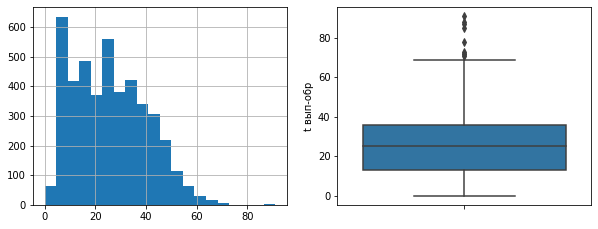

t обработка 
Пропущенных значений: 3 ( 0.07 %) 
Медиана: 44.1666667, Среднее значение: 45.747, Ср.откл:10.003 



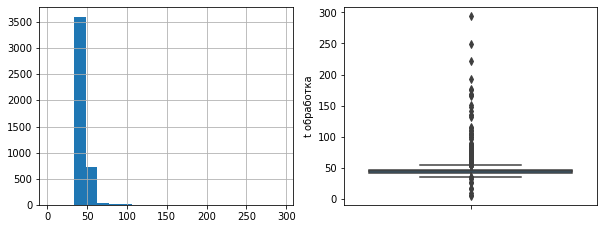

t под током 
Пропущенных значений: 3 ( 0.07 %) 
Медиана: 20.216666699999998, Среднее значение: 20.743, Ср.откл:4.583 



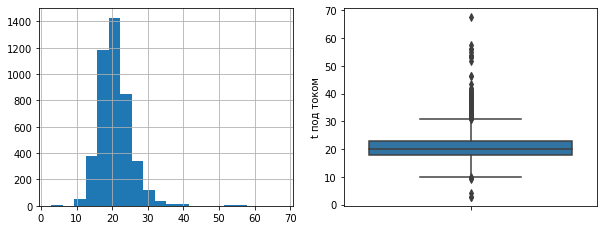

t продувка 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 44.05833335, Среднее значение: 45.667, Ср.откл:9.693 



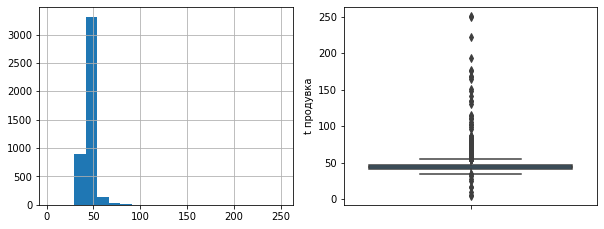

ПСН гр. 
Пропущенных значений: 842 ( 19.0 %) 
Медиана: 3.0, Среднее значение: 2.98, Ср.откл:0.732 



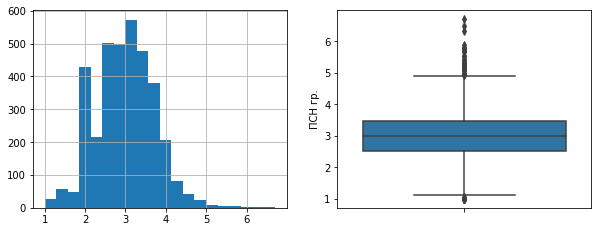

чист расход C 
Пропущенных значений: 6 ( 0.14 %) 
Медиана: 0.3773944, Среднее значение: 0.376, Ср.откл:0.076 



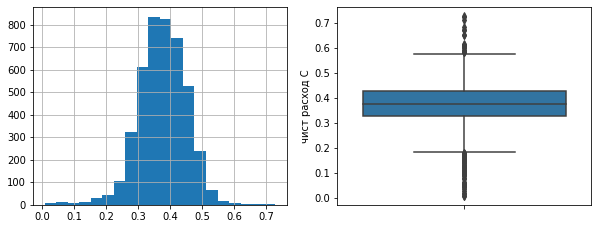

чист расход Cr 
Пропущенных значений: 15 ( 0.34 %) 
Медиана: 0.12584, Среднее значение: 0.125, Ср.откл:0.027 



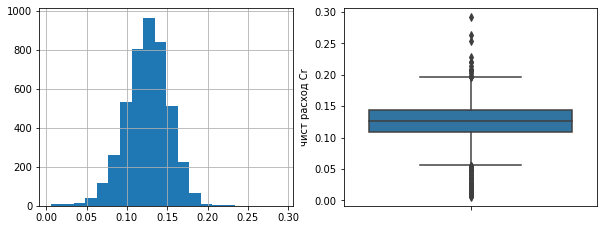

чист расход Mn 
Пропущенных значений: 9 ( 0.2 %) 
Медиана: 0.133436, Среднее значение: 0.134, Ср.откл:0.049 



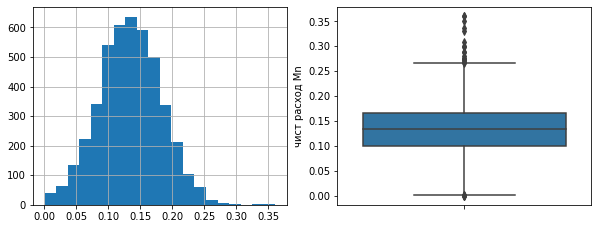

чист расход Si 
Пропущенных значений: 9 ( 0.2 %) 
Медиана: 0.13431300000000002, Среднее значение: 0.137, Ср.откл:0.039 



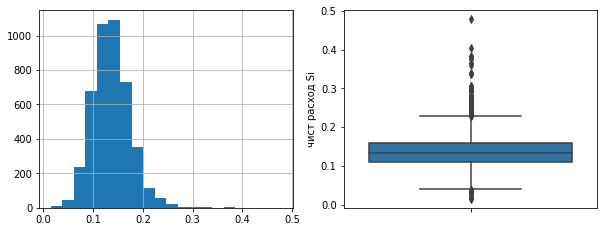

чист расход V 
Пропущенных значений: 18 ( 0.41 %) 
Медиана: 0.039631099999999995, Среднее значение: 0.04, Ср.откл:0.002 



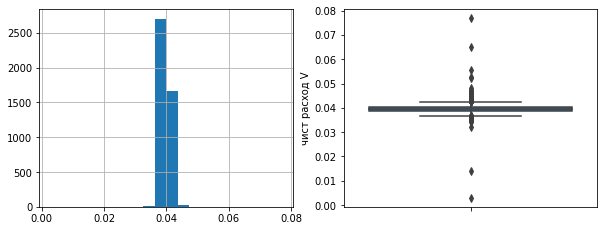

температура первая 
Пропущенных значений: 4 ( 0.09 %) 
Медиана: 1568.0, Среднее значение: 1567.722, Ср.откл:22.184 



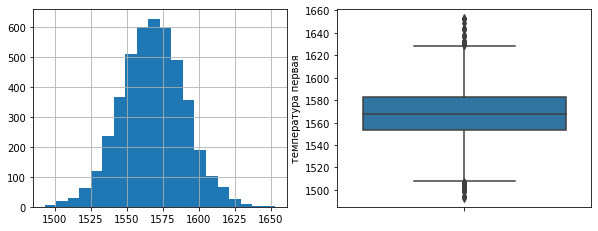

Ar (интенс.) 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 10.778037849999999, Среднее значение: 11.345, Ср.откл:3.447 



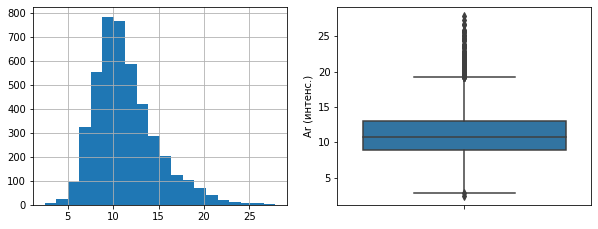

эл. энергия (интенс.) 
Пропущенных значений: 3 ( 0.07 %) 
Медиана: 13031.123139399999, Среднее значение: 12980.913, Ср.откл:899.391 



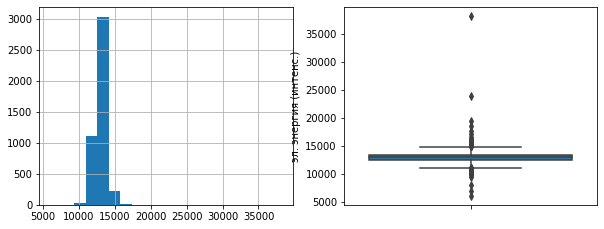

расход газ Ar 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 16.1055, Среднее значение: 16.996, Ср.откл:5.628 



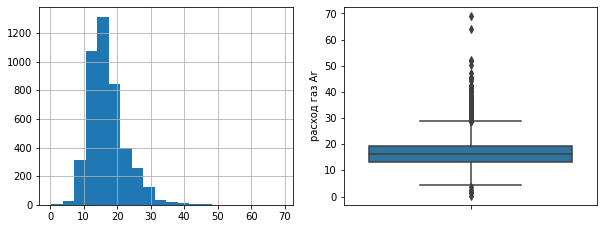

сыпуч известь РП 
Пропущенных значений: 1148 ( 25.9 %) 
Медиана: 0.11599999999999999, Среднее значение: 0.13, Ср.откл:0.076 



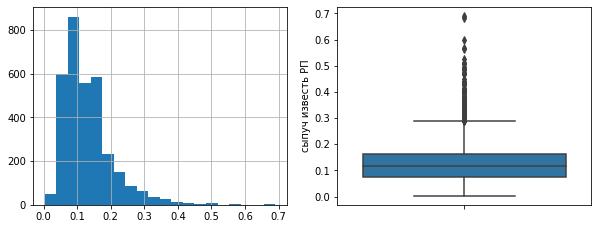

сыпуч  шпат плав. 
Пропущенных значений: 316 ( 7.13 %) 
Медиана: 0.048, Среднее значение: 0.054, Ср.откл:0.023 



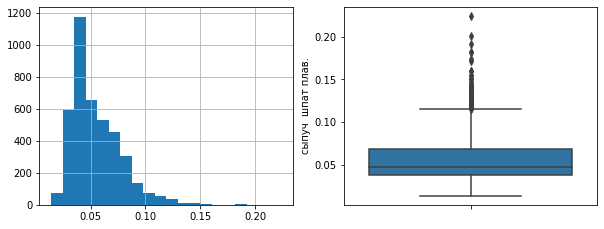

ферспл CaC2 
Пропущенных значений: 126 ( 2.84 %) 
Медиана: 0.02, Среднее значение: 0.02, Ср.откл:0.001 



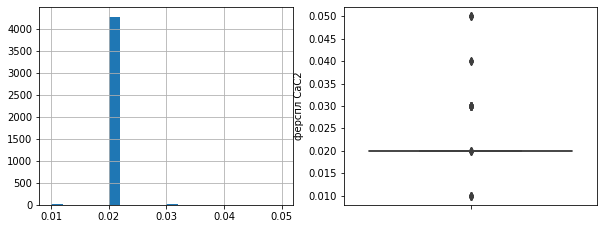

ферспл  Mn5Si65Al0.5 
Пропущенных значений: 15 ( 0.34 %) 
Медиана: 0.152, Среднее значение: 0.155, Ср.откл:0.051 



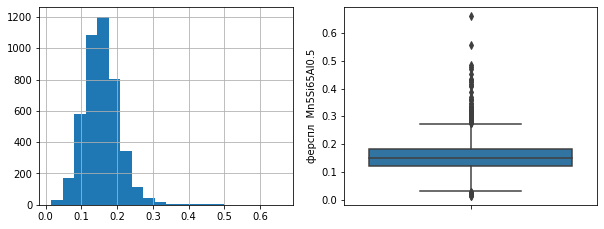

ферспл SiMn18 
Пропущенных значений: 30 ( 0.68 %) 
Медиана: 0.20600000000000002, Среднее значение: 0.207, Ср.откл:0.075 



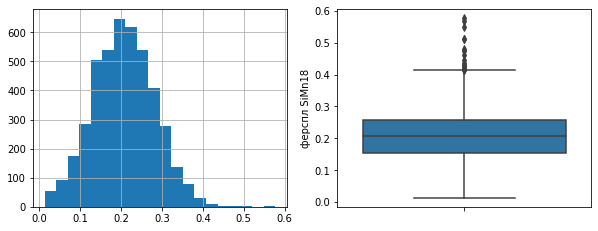

химсталь первый Al_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.002, Среднее значение: 0.002, Ср.откл:0.0 



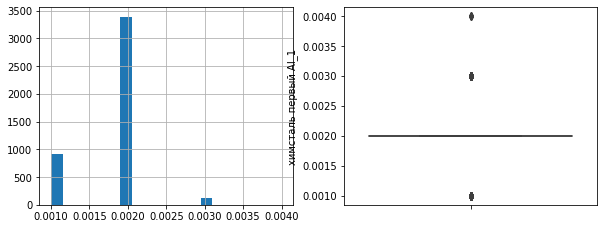

химсталь первый Mn_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.6709999999999999, Среднее значение: 0.671, Ср.откл:0.042 



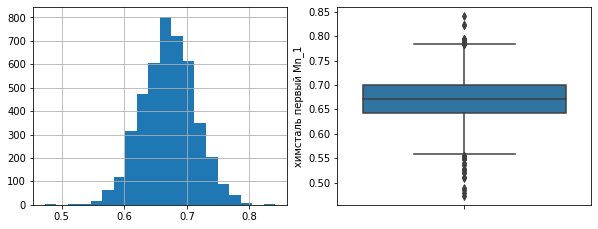

химсталь первый Si_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.451, Среднее значение: 0.449, Ср.откл:0.03 



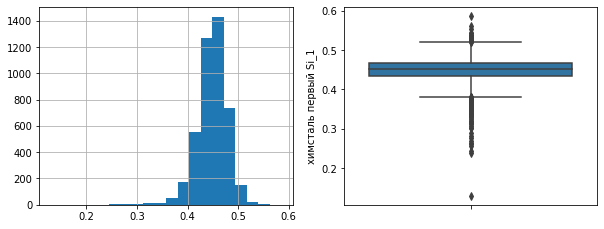

химсталь первый V_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.003, Среднее значение: 0.003, Ср.откл:0.003 



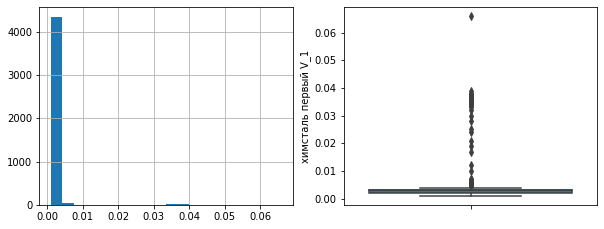

химсталь последний Al 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.003, Среднее значение: 0.003, Ср.откл:0.001 



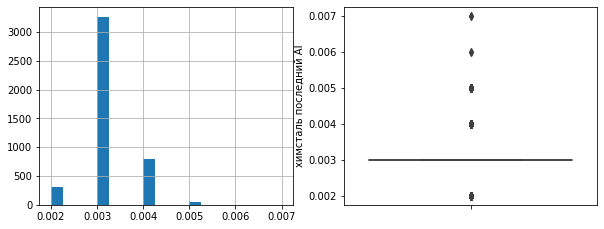

химсталь последний Ca 
Пропущенных значений: 127 ( 2.87 %) 
Медиана: 0.0003, Среднее значение: 0.0, Ср.откл:0.0 



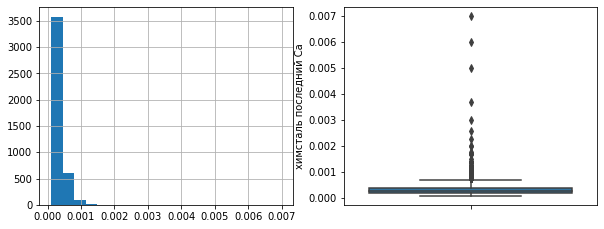

химсталь последний Mn 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.7879999999999999, Среднее значение: 0.788, Ср.откл:0.007 



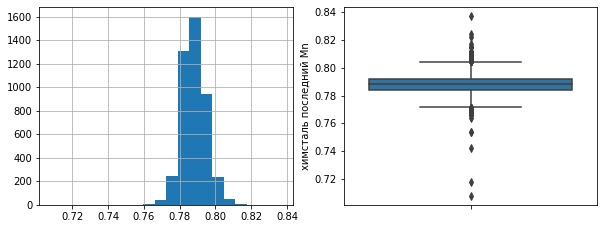

химсталь последний Si 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.565, Среднее значение: 0.565, Ср.откл:0.01 



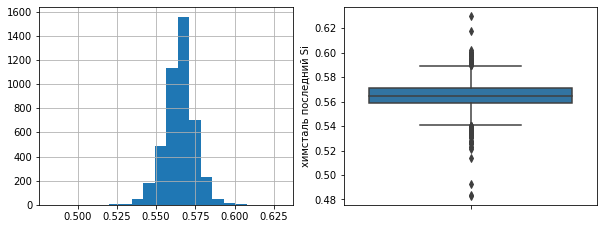

химсталь последний V 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.037000000000000005, Среднее значение: 0.037, Ср.откл:0.001 



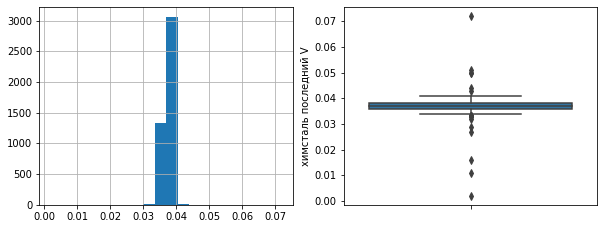

химшлак первый Al2O3_1 
Пропущенных значений: 1168 ( 26.35 %) 
Медиана: 4.0, Среднее значение: 4.087, Ср.откл:0.857 



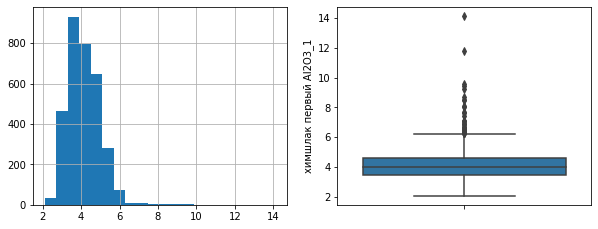

химшлак первый CaO_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 54.7, Среднее значение: 54.536, Ср.откл:5.001 



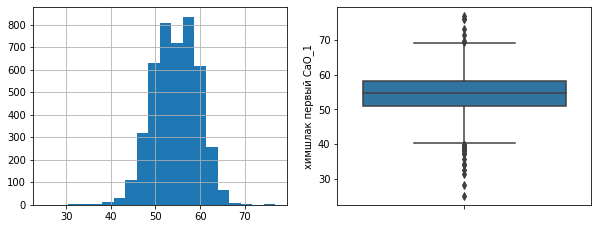

химшлак первый FeO_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.6, Среднее значение: 0.674, Ср.откл:0.611 



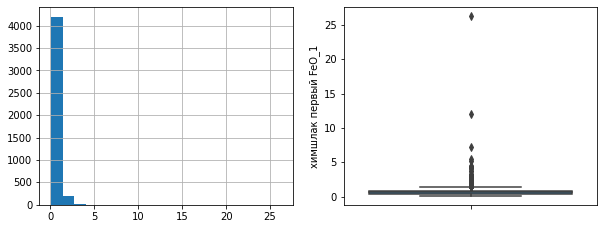

химшлак первый MgO_1 
Пропущенных значений: 1 ( 0.02 %) 
Медиана: 11.3, Среднее значение: 11.552, Ср.откл:3.496 



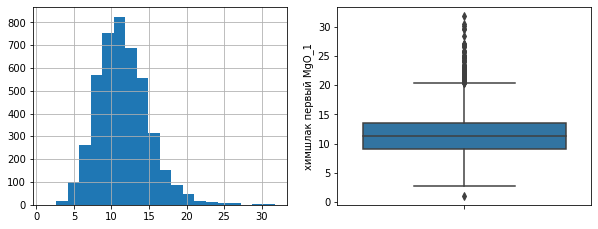

химшлак первый MnO_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.14, Среднее значение: 0.199, Ср.откл:0.205 



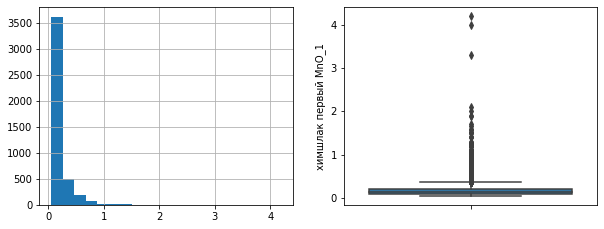

химшлак первый R_1 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 2.4, Среднее значение: 2.408, Ср.откл:0.317 



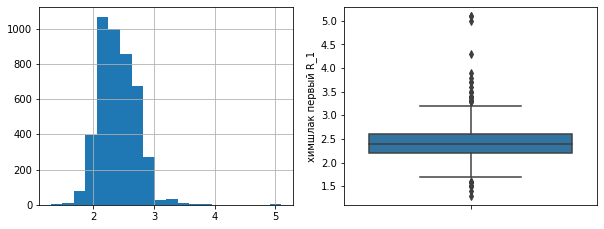

химшлак первый SiO2_1 
Пропущенных значений: 1168 ( 26.35 %) 
Медиана: 22.8, Среднее значение: 22.754, Ср.откл:2.381 



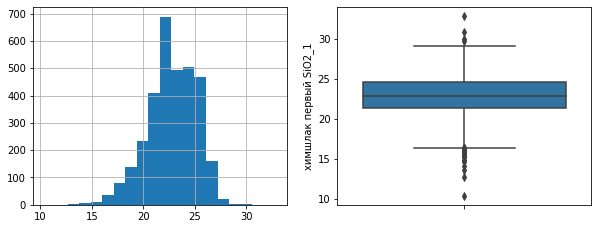

химшлак последний Al2O3 
Пропущенных значений: 1168 ( 26.35 %) 
Медиана: 4.4, Среднее значение: 4.533, Ср.откл:0.956 



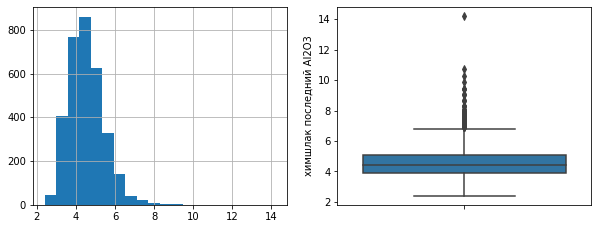

химшлак последний CaO 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 56.9, Среднее значение: 56.501, Ср.откл:3.756 



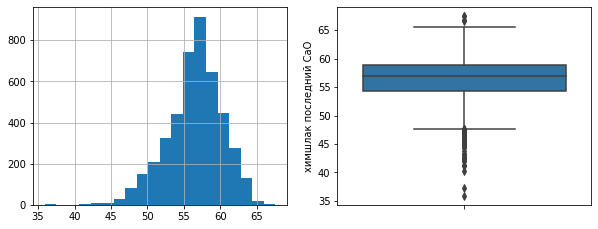

химшлак последний FeO 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.6, Среднее значение: 0.584, Ср.откл:0.213 



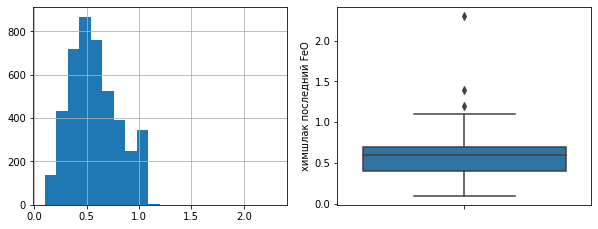

химшлак последний MgO 
Пропущенных значений: 1 ( 0.02 %) 
Медиана: 8.9, Среднее значение: 9.023, Ср.откл:3.171 



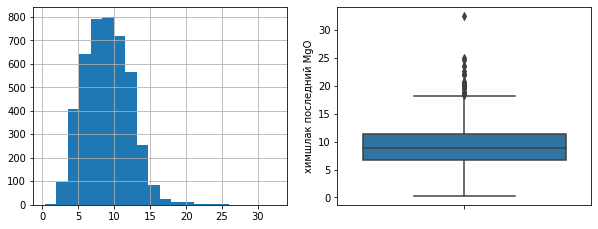

химшлак последний MnO 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 0.11, Среднее значение: 0.12, Ср.откл:0.058 



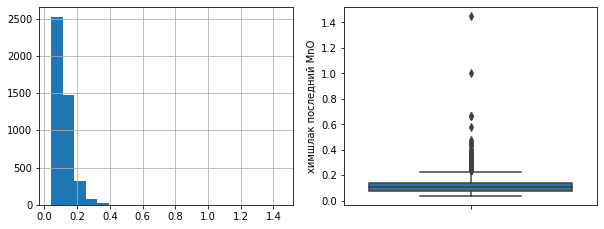

химшлак последний R 
Пропущенных значений: 0 ( 0.0 %) 
Медиана: 2.3, Среднее значение: 2.36, Ср.откл:0.223 



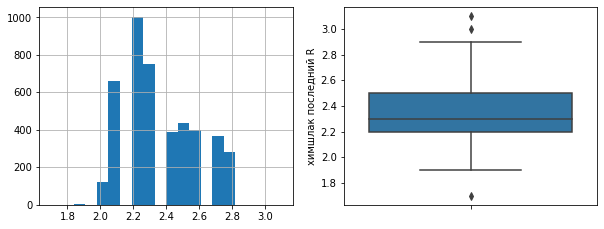

химшлак последний SiO2 
Пропущенных значений: 1168 ( 26.35 %) 
Медиана: 24.6, Среднее значение: 24.037, Ср.откл:2.178 



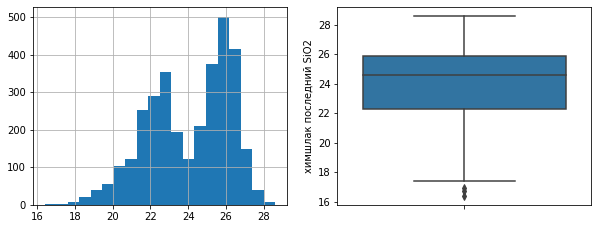

In [384]:
description_graphs(dict_marks_df['Э76ХФ'])

In [385]:
# Заменить все сыпучие null на 0
# Удалили все чистые добавки
# Посмотреть ещё на корелляции в других группах
# В распределениях появились интересные закономерности, а может систематические ошибки (Ti)
# При разбитии сталей на марки появилось много просто null признаков, например можно удалить вообще ВСЁ 
# про молибден, попробовать
# Видно, что на марке Э76ХФ 

In [386]:
big_steel = dict_marks_df['Э76ХФ']

In [387]:
big_steel.shape

(4432, 42)

In [388]:
big_steel = big_steel[big_steel['химшлак первый Al2O3_1'].notna()]

big_steel.shape

(3264, 42)

In [389]:
big_steel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3264 entries, 589 to 7026
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   t вып-обр                3264 non-null   float64
 1   t обработка              3262 non-null   float64
 2   t под током              3263 non-null   float64
 3   t продувка               3264 non-null   float64
 4   ПСН гр.                  2610 non-null   float64
 5   чист расход C            3260 non-null   float64
 6   чист расход Cr           3254 non-null   float64
 7   чист расход Mn           3258 non-null   float64
 8   чист расход Si           3258 non-null   float64
 9   чист расход V            3250 non-null   float64
 10  температура первая       3261 non-null   float64
 11  Ar (интенс.)             3264 non-null   float64
 12  эл. энергия (интенс.)    3263 non-null   float64
 13  расход газ Ar            3264 non-null   float64
 14  сыпуч известь РП      

In [390]:
big_steel = big_steel.fillna(value=dict.fromkeys(['ферспл  Mn5Si65Al0.5', 'ферспл SiMn18', 'чист расход C', 'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'расход газ Ar', 'сыпуч известь РП', 'сыпуч  шпат плав.', 'ферспл CaC2'], 0))
for col in ['t обработка', 't под током', 'температура первая', 'эл. энергия (интенс.)', 'химшлак первый MgO_1']:
    big_steel = big_steel[big_steel[col].notna()]
for col in big_steel.iloc[:, 18:45].columns:
    big_steel = big_steel[big_steel[col].notna()]
big_steel = big_steel.fillna(value=dict.fromkeys(['ПСН гр.'], big_steel['ПСН гр.'].median()))

#big_steel = big_steel.fillna(value=dict.fromkeys(['химшлак первый Al2O3_1'], big_steel['химшлак первый Al2O3_1'].mean()))
#big_steel = big_steel.fillna(value=dict.fromkeys(['химшлак первый SiO2_1'], big_steel['химшлак первый SiO2_1'].mean()))
#big_steel = big_steel.fillna(value=dict.fromkeys(['химшлак последний Al2O3'], big_steel['химшлак последний Al2O3'].mean()))
#big_steel = big_steel.fillna(value=dict.fromkeys(['химшлак последний SiO2'], big_steel['химшлак последний SiO2'].mean()))

big_steel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3167 entries, 1345 to 7026
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   t вып-обр                3167 non-null   float64
 1   t обработка              3167 non-null   float64
 2   t под током              3167 non-null   float64
 3   t продувка               3167 non-null   float64
 4   ПСН гр.                  3167 non-null   float64
 5   чист расход C            3167 non-null   float64
 6   чист расход Cr           3167 non-null   float64
 7   чист расход Mn           3167 non-null   float64
 8   чист расход Si           3167 non-null   float64
 9   чист расход V            3167 non-null   float64
 10  температура первая       3167 non-null   float64
 11  Ar (интенс.)             3167 non-null   float64
 12  эл. энергия (интенс.)    3167 non-null   float64
 13  расход газ Ar            3167 non-null   float64
 14  сыпуч известь РП     

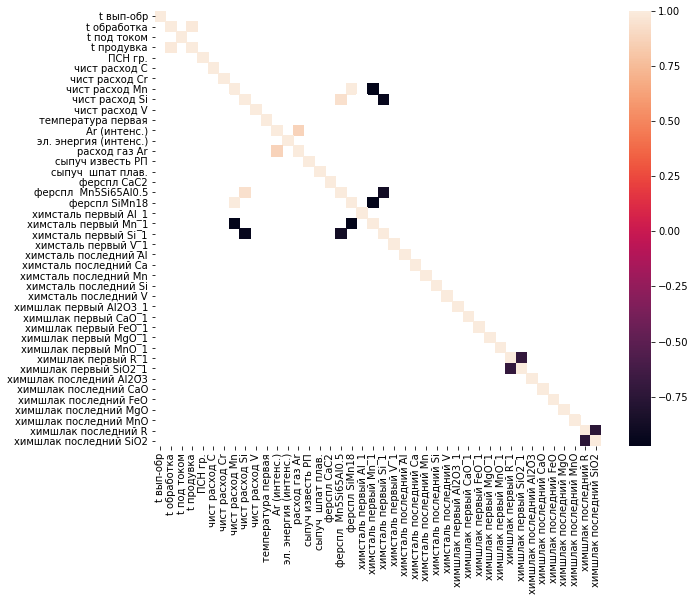

In [391]:
corr_matrix = big_steel.corr()
corr_matrix = corr_matrix[np.abs(corr_matrix) > 0.7]

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix)

In [392]:
to_drop = ['химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R',
       'химшлак последний SiO2']
X = StandardScaler().fit_transform(big_steel.drop(to_drop, axis=1))

targets = ['химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R', 'химшлак последний Al2O3', 'химшлак последний SiO2']

In [393]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import make_scorer

for t in targets:
    y = big_steel[t] 
    lg_R = LinearRegression()
    score = cross_val_score(lg_R, X, y, scoring=make_scorer(mean_absolute_percentage_error), cv=5, ).mean()
    print(t, "\nmedian: ", y.median(), "\n", score * 100, "%")

химшлак последний CaO 
median:  56.7 
 4.920584699457583 %
химшлак последний FeO 
median:  0.6 
 35.751741832651675 %
химшлак последний MgO 
median:  9.3 
 26.998263249237375 %
химшлак последний MnO 
median:  0.1 
 29.4435497167947 %
химшлак последний R 
median:  2.3 
 6.261090794647398 %
химшлак последний Al2O3 
median:  4.4 
 11.117043321557436 %
химшлак последний SiO2 
median:  24.6 
 7.116687363867954 %


In [394]:
to_drop = ['химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R',
       'химшлак последний SiO2']

X = big_steel.drop(to_drop, axis=1)

targets = ['химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R', 'химшлак последний Al2O3', 'химшлак последний SiO2']

for i in range(len(targets)):
    best_score_t = ""
    best_score = 1
    best_pred = []
    for t in targets:
        y = big_steel[t] 
        lg_R = LinearRegression(normalize=True)
        score = cross_val_score(lg_R, X, y, scoring=make_scorer(mean_absolute_percentage_error), cv=5).mean()      
        
        if score < best_score:
            best_score_t = t
            best_score = score
    best_pred = LinearRegression(normalize=True).fit(X, y).predict(X)
    
    print(best_score_t, "\n", best_score * 100, "%")
    targets.remove(best_score_t)
    X[best_score_t] = best_pred

химшлак последний CaO 
 4.920584699457582 %
химшлак последний R 
 6.258181695472922 %
химшлак последний SiO2 
 7.119955323570829 %
химшлак последний Al2O3 
 11.124691414346021 %
химшлак последний MgO 
 26.97086368073315 %
химшлак последний MnO 
 29.506243575071068 %
химшлак последний FeO 
 35.81225089610173 %


In [400]:
from sklearn.ensemble import GradientBoostingRegressor

to_drop = ['химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R',
       'химшлак последний SiO2']

X = big_steel.drop(to_drop, axis=1)

targets = ['химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R', 'химшлак последний Al2O3', 'химшлак последний SiO2']

for i in range(len(targets)):
    best_score_t = ""
    best_score = 1
    best_pred = []
    for t in targets:
        y = big_steel[t] 
        reg = GradientBoostingRegressor(n_estimators=150, loss="ls", max_depth=4)
        score = cross_val_score(reg, X, y, scoring=make_scorer(mean_absolute_percentage_error), cv=5).mean()      
        
        if score < best_score:
            best_score_t = t
            best_score = score
    best_pred = GradientBoostingRegressor(n_estimators=150,  loss="ls", max_depth=5).fit(X, y).predict(X)
    
    print(best_score_t, "\n", best_score * 100, "%")
    targets.remove(best_score_t)
    X[best_score_t] = best_pred

химшлак последний CaO 
 5.050166646432499 %
химшлак последний SiO2 
 2.5220718559973254 %
химшлак последний R 
 3.8774529958359687 %
химшлак последний Al2O3 
 4.791651385575704 %
химшлак последний MgO 
 26.26131790879741 %
химшлак последний MnO 
 12.882687906941669 %
химшлак последний FeO 
 32.88212893948575 %


In [399]:
to_drop = ['химшлак последний Al2O3', 'химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R',
       'химшлак последний SiO2']

X = big_steel.drop(to_drop, axis=1)

targets = ['химшлак последний CaO',
       'химшлак последний FeO', 'химшлак последний MgO',
       'химшлак последний MnO', 'химшлак последний R', 'химшлак последний Al2O3', 'химшлак последний SiO2']


for t in targets:
    y = big_steel[t] 
    score = cross_val_score(GradientBoostingRegressor(n_estimators=150, loss="ls", max_depth=5), X, y, scoring=make_scorer(mean_absolute_percentage_error), cv=5, ).mean()
    print(t, "\n", score * 100, "%")

химшлак последний CaO 
 5.045373835973325 %
химшлак последний FeO 
 36.68882572853073 %
химшлак последний MgO 
 27.124155393345333 %
химшлак последний MnO 
 33.589783356117884 %
химшлак последний R 
 6.245620716804674 %
химшлак последний Al2O3 
 11.943216401854366 %
химшлак последний SiO2 
 7.182193457425908 %
